# Deer Population Experiments


In [1]:
%load_ext autoreload
%autoreload 2

from src.main_emp import runSimulation, HuntingParameters, ModelParameters

## Set up parameter options


In [2]:
# Define yearly cull data
culling_data = {
    2005: {'calves': 160, 'hinds': 570, 'stags': 420},
    2006: {'calves': 200, 'hinds': 500, 'stags': 520},
    2007: {'calves': 260, 'hinds': 580, 'stags': 450},
    2008: {'calves': 210, 'hinds': 550, 'stags': 450},
    2009: {'calves': 260, 'hinds': 490, 'stags': 430},
    2010: {'calves': 270, 'hinds': 510, 'stags': 520},
    2011: {'calves': 160, 'hinds': 490, 'stags': 550},
    2012: {'calves': 290, 'hinds': 600, 'stags': 590},
    2013: {'calves': 290, 'hinds': 650, 'stags': 610},
    2014: {'calves': 290, 'hinds': 620, 'stags': 500},
    2015: {'calves': 220, 'hinds': 590, 'stags': 510},
    2016: {'calves': 290, 'hinds': 610, 'stags': 490},
    2017: {'calves': 400, 'hinds': 830, 'stags': 600},
    2018: {'calves': 200, 'hinds': 520, 'stags': 580},
}

# Instantiate HuntingParameters with yearly cull data
harvestEqual = HuntingParameters(culling_data=culling_data)

In [3]:
defaultParameters = ModelParameters(
    maxCapacityImpact=0.3,
    capacityCurveSlope=1,
    initialIndividuals=10200,
    maximumIndividuals=15000,
    huntingLimit=2000,
)

Starting 10200
After grow: 10200
Calves: 0
0
Hinds: 6150
6150
Stags: 4050
4050
After reproduce: 10875
Calves: 675
Hinds: 6150
Stags: 4050
After death: 5043
Calves: 584
Hinds: 2282
Stags: 2177
After hunt: 3893
Calves: 424
Hinds: 1712
Stags: 1757
After grow: 3893
Calves: 0
0
Hinds: 1903
1903
Stags: 1990
1990
After reproduce: 5485
Calves: 1592
Hinds: 1903
Stags: 1990
After death: 5138
Calves: 1358
Hinds: 1853
Stags: 1927
After hunt: 3918
Calves: 1158
Hinds: 1353
Stags: 1407
After grow: 3918
Calves: 0
0
Hinds: 1927
1927
Stags: 1991
1991
After reproduce: 5306
Calves: 1388
Hinds: 1927
Stags: 1991
After death: 4983
Calves: 1202
Hinds: 1850
Stags: 1931
After hunt: 3693
Calves: 942
Hinds: 1270
Stags: 1481
After grow: 3693
Calves: 0
0
Hinds: 1716
1716
Stags: 1977
1977
After reproduce: 4962
Calves: 1269
Hinds: 1716
Stags: 1977
After death: 4622
Calves: 1081
Hinds: 1641
Stags: 1900
After hunt: 3412
Calves: 871
Hinds: 1091
Stags: 1450
After grow: 3412
Calves: 0
0
Hinds: 1551
1551
Stags: 1861
1861
A

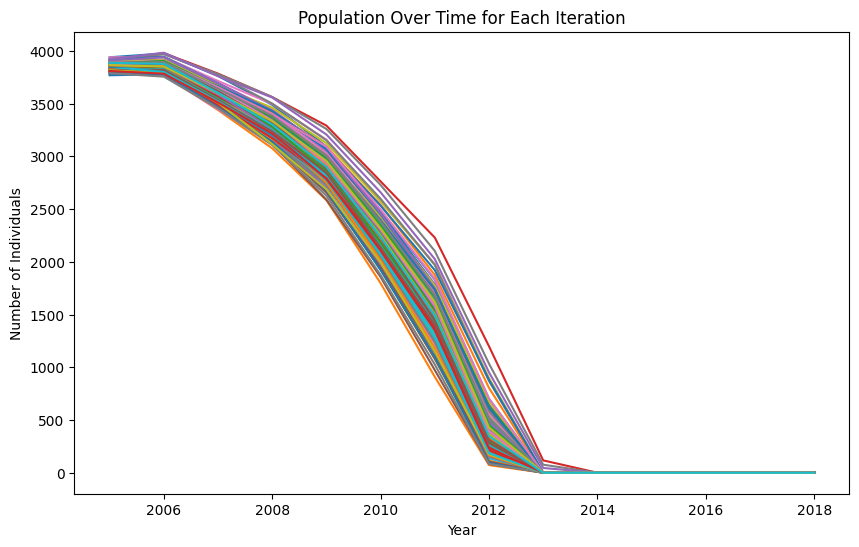

In [8]:
import matplotlib.pyplot as plt

population_df = runSimulation(defaultParameters, harvestEqual, samples=100)

# Plot the population over time for each iteration
plt.figure(figsize=(10, 6))

for iteration, group in population_df.groupby("iteration"):
    plt.plot(group["year"], group["num_individuals"])

plt.xlabel("Year")
plt.ylabel("Number of Individuals")
plt.title("Population Over Time for Each Iteration")
plt.show()